In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [4]:
## Your code here
df.Runs = df.Runs.apply(lambda x: int(x[:-1]) if x[-1] == '*' else int(x))
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [5]:
a = np.percentile(df.Runs, 50)
b = np.percentile(df.Runs, 25)

a, b, a-b

(32.5, 10.0, 22.5)

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


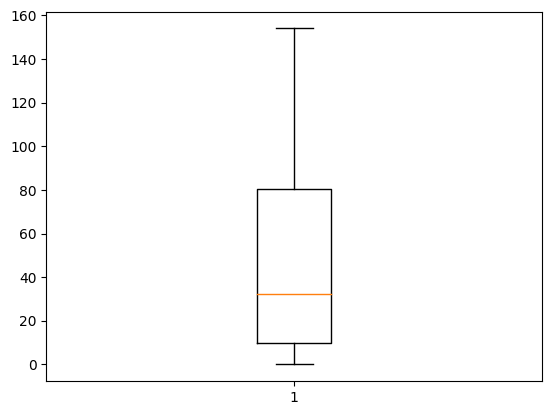

In [6]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

In [7]:
c = np.percentile(df.Runs, 100)
c, (c in range(140, 160))

(154.0, True)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [8]:
## Your code here

df['Start Date'] = df['Start Date'].apply(lambda x: (x[-2:]))
df['Start Date']

0      08
1      08
2      08
3      08
4      08
       ..
127    16
128    16
129    17
130    17
131    17
Name: Start Date, Length: 132, dtype: object

In [9]:
# for verifying statement 1
df['Start Date'].value_counts()

11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: Start Date, dtype: int64

In [10]:
# for verifying statement 2

avg_run_2017 = pd.pivot_table(df,
                              values = 'Runs',
                              columns = ['Start Date'],
                              aggfunc = np.mean
                              )
avg_run_2017

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


In [11]:
mx_rn_17 = avg_run_2017.loc['Runs'].max()
mx_rn_17

73.9

In [12]:
mx_dt_17 = avg_run_2017.apply(dict)['17']
mx_dt_17

{'Runs': 61.666666666666664}

In [13]:
mx_dt_17['Runs'] >= mx_rn_17

False

In [14]:
# for verifying statement 3

max_run_2016 = pd.pivot_table(df,
                              values = 'Runs',
                              columns = ['Start Date'],
                              aggfunc = np.max
                              )
max_run_2016

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


In [15]:
mx_rn_16 = max_run_2016.loc['Runs'].max()
mx_rn_16

154

In [16]:
mx_dt_16 = max_run_2016.apply(dict)['16']
mx_dt_16

{'Runs': 154}

In [17]:
mx_dt_16['Runs'] >= mx_rn_16

True

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [23]:
df.Mins.head(15)

0      33
1      82
2      40
3      87
4      45
5       6
6      53
7      32
8      20
9      93
10      -
11    136
12    128
13      -
14      -
Name: Mins, dtype: object

In [22]:
#Your code here
df2 = df[~(df['Mins'] == '-')]
df2.Mins.dtypes

dtype('O')

In [24]:
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))
df2.Mins.head(15)

<ipython-input-24-1c045135a150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


0      33
1      82
2      40
3      87
4      45
5       6
6      53
7      32
8      20
9      93
11    136
12    128
15      3
16     28
17     13
Name: Mins, dtype: int64

In [25]:
df2.dtypes
# Mins           int64

Runs           int64
Mins           int64
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

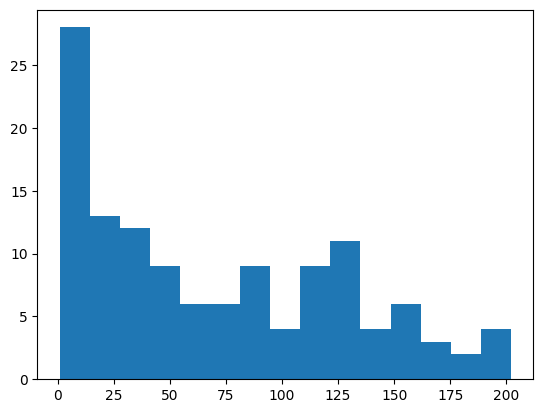

In [26]:
plt.hist(df2.Mins, bins = 15)
plt.show()

Clearly **C [121.6 - 135)** has the highest frequency